In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [64]:
# 데이터 불러오기
road = pd.read_csv('/content/drive/MyDrive/2023/인구/인천광역시연도별성별인구.csv',encoding = "euc-kr", engine='python')
road

,연도,총인구,남,여
0,2016,2943069,1477671,1465398
1,2017,2948542,1479597,1468945
2,2018,2954642,1481844,1472798
3,2019,2957026,1482249,1474777
4,2020,2942828,1473943,1468885


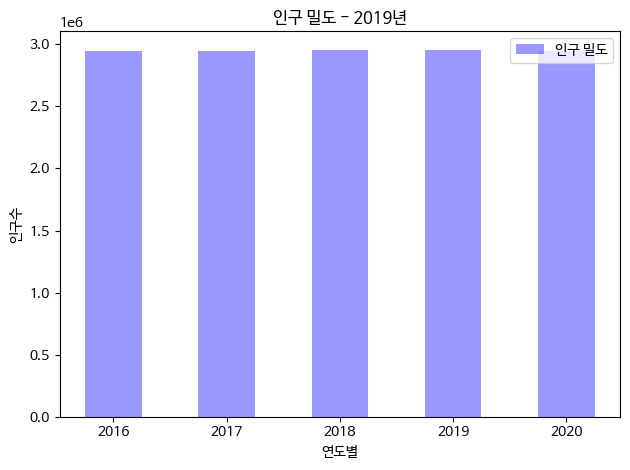

In [65]:
#히스토그램 그리기 - 총 인구밀도-2019


#특정 열 값들을 리스트로 변환
area = road['연도']
human = road['총인구']

index = np.arange(len(human))
bar_width = 0.5
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, human, bar_width, alpha=opacity, color='b',
                 yerr=None,error_kw=error_config,label='인구 밀도')

plt.xlabel('연도별')
plt.ylabel('인구수')
plt.title('인구 밀도 - 2019년')
plt.xticks(index, area)
plt.legend()
plt.tight_layout()

plt.show()

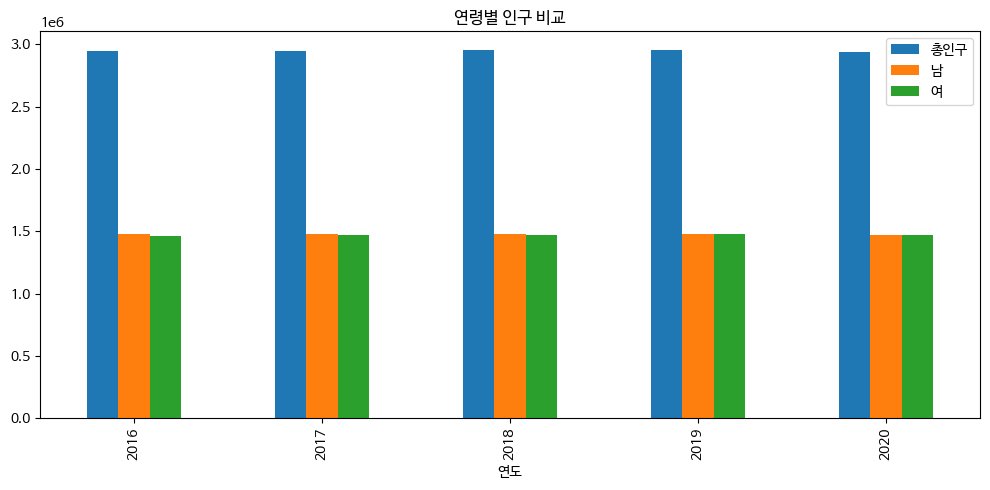

In [56]:
# 지역을 인덱스로 설정
road.set_index('연도', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
road.plot(kind='bar', ax=ax)
ax.set_title('연령별 인구 비교')
plt.tight_layout()
plt.show()